## Create the Pathway Tree with associated gene sets

In [1]:
import pandas as pd
import networkx as nx
import pickle

## Open Files

In [2]:
pathwaysDF = pd.read_csv("ReactomePathways.txt",sep="\t",names=["Code","Name","Specie"])
print(pathwaysDF.shape)
####Keeping only Homo Sapiens
pathwaysDF=pathwaysDF[pathwaysDF.Specie.isin(["Homo sapiens"])]
print(pathwaysDF.shape)


pathwaysHierarchy = pd.read_csv("ReactomePathwaysHierarchy.txt",sep="\t",names=["CodeA","CodeB"],dtype = {'CodeA': str, 'CodeB':str})
print(pathwaysHierarchy.shape)

(22231, 3)
(2698, 3)
(22354, 2)


In [3]:
file_path = "ReactomePathways.gmt"
pathwayGeneSet={}
with open(file_path, 'r') as file:
    for line in file:
        lineAsList=line.strip().split("\t")
        #Check if this pathways if from Homo sapiens
        if pathwaysDF.loc[pathwaysDF['Code'] == lineAsList[1]].shape[0] == 1:
            pathwayGeneSet[lineAsList[0]]=lineAsList[2:]

## Create the network (Tree)
For each Super Pathway, create a Tree. These tree are same as the ones Reactome shows here: https://reactome.org/PathwayBrowser/

In [4]:
listOfSuperPathways=["Autophagy","Cell Cycle","Cell-Cell communication","Cellular responses to stimuli","Chromatin organization","Circadian Clock","Developmental Biology","Digestion and absorption","DNA Repair","DNA Replication","Extracellular matrix organization","Gene expression (Transcription)","Hemostasis","Immune System","Metabolism","Metabolism of proteins","Metabolism of RNA","Muscle contraction","Neuronal System","Organelle biogenesis and maintenance","Programmed Cell Death","Protein localization","Reproduction","Sensory Perception","Signal Transduction","Transport of small molecules","Vesicle-mediated transport"]
len(listOfSuperPathways)

27

In [5]:
#Get super pathways code
pathwayNetworks={}
print("Super Pathway - N of CCs - N. of Nodes\n")
for sp in listOfSuperPathways:
    G=nx.Graph()
    code = str(pathwaysDF.loc[pathwaysDF['Name'] == sp]["Code"].values[0])
    #CREATE THE TREE USING BFS
    codeA = code
    children = list(pathwaysHierarchy.loc[pathwaysHierarchy["CodeA"]==codeA]["CodeB"].values)
    toVisit=[]
    while len(children) > 0 or len(toVisit) > 0:
        #print(codeA,children,toVisit,sep=" | ")
        for c in children:
            G.add_edge(
                str(pathwaysDF.loc[pathwaysDF['Code'] == codeA]["Name"].values[0]),
                str(pathwaysDF.loc[pathwaysDF['Code'] == c]["Name"].values[0]))
            toVisit.append(c)
        children=[]
        if len(toVisit)>0:
            codeA = toVisit.pop(0)
            children = list(pathwaysHierarchy.loc[pathwaysHierarchy["CodeA"]==codeA]["CodeB"].values)
    
    ccs=len(list(nx.connected_components(G)))
    nodes=nx.number_of_nodes(G)
    print(sp,ccs,nodes,sep=" - ")    
    pathwayNetworks[sp]=G

    

Super Pathway - N of CCs - N. of Nodes

Autophagy - 1 - 11
Cell Cycle - 1 - 126
Cell-Cell communication - 1 - 21
Cellular responses to stimuli - 1 - 51
Chromatin organization - 1 - 7
Circadian Clock - 1 - 4
Developmental Biology - 1 - 100
Digestion and absorption - 1 - 7
DNA Repair - 1 - 64
DNA Replication - 1 - 18
Extracellular matrix organization - 1 - 19
Gene expression (Transcription) - 1 - 132
Hemostasis - 1 - 39
Immune System - 1 - 197
Metabolism - 1 - 333
Metabolism of proteins - 1 - 120
Metabolism of RNA - 1 - 53
Muscle contraction - 1 - 11
Neuronal System - 1 - 78
Organelle biogenesis and maintenance - 1 - 13
Programmed Cell Death - 1 - 42
Protein localization - 1 - 6
Reproduction - 1 - 9
Sensory Perception - 1 - 19
Signal Transduction - 1 - 407
Transport of small molecules - 1 - 70
Vesicle-mediated transport - 1 - 38


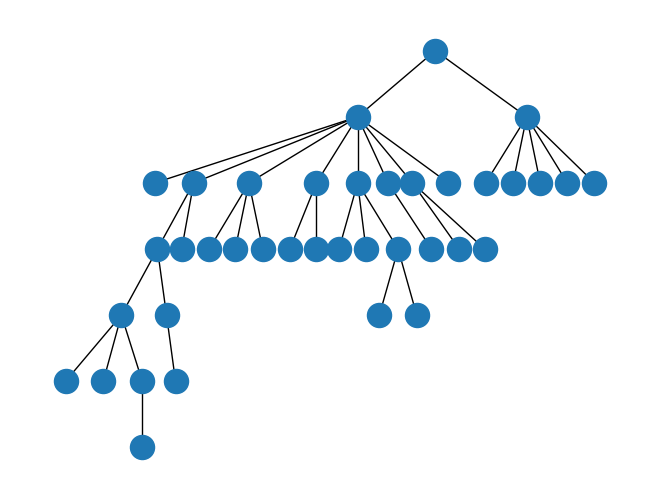

In [6]:
pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
# nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=10, font_weight="bold")
# plt.show()
nx.draw(G,pos,with_labels=False)

## Save files in the Disk

In [7]:
with open("pathwayGeneSet.pickle", "wb") as file:
    pickle.dump(pathwayGeneSet, file)


In [8]:
with open("pathwayNetworks.pickle", "wb") as file:
    pickle.dump(pathwayNetworks, file)